In [2]:
import tensorflow as tf
import numpy as np
import pickle

In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\input_layer_4_6_18_3.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation, :]
x_train = input_data[:100000,:]
x_valid = input_data[100000:102500, :]
x_test = input_data[102500:,:]



(105000, 24)


In [4]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\output_layer_4_6_18_3.pickle','rb') as file:
    output_data = pickle.load(file)
    
output_data = np.transpose(output_data)
output_data = output_data[permutation, :]
y_train = output_data[:100000,:]
y_valid = output_data[100000:102500, :]
y_test = output_data[102500:,:]
print(output_data.shape)

(105000, 12)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150,input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.0035)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2,validation_data = (x_valid, y_valid))


Train on 100000 samples, validate on 2500 samples
Epoch 1/100
100000/100000 - 3s - loss: 0.3221 - accuracy: 0.8561 - val_loss: 0.2345 - val_accuracy: 0.8882
Epoch 2/100
100000/100000 - 2s - loss: 0.2014 - accuracy: 0.9018 - val_loss: 0.1832 - val_accuracy: 0.9081
Epoch 3/100
100000/100000 - 2s - loss: 0.1681 - accuracy: 0.9160 - val_loss: 0.1596 - val_accuracy: 0.9196
Epoch 4/100
100000/100000 - 2s - loss: 0.1551 - accuracy: 0.9224 - val_loss: 0.1526 - val_accuracy: 0.9226
Epoch 5/100
100000/100000 - 2s - loss: 0.1453 - accuracy: 0.9278 - val_loss: 0.1483 - val_accuracy: 0.9251
Epoch 6/100
100000/100000 - 2s - loss: 0.1398 - accuracy: 0.9311 - val_loss: 0.1375 - val_accuracy: 0.9309
Epoch 7/100
100000/100000 - 2s - loss: 0.1351 - accuracy: 0.9337 - val_loss: 0.1365 - val_accuracy: 0.9320
Epoch 8/100
100000/100000 - 2s - loss: 0.1301 - accuracy: 0.9369 - val_loss: 0.1373 - val_accuracy: 0.9316
Epoch 9/100
100000/100000 - 2s - loss: 0.1273 - accuracy: 0.9386 - val_loss: 0.1271 - val_accu

Epoch 77/100
100000/100000 - 2s - loss: 0.0162 - accuracy: 0.9936 - val_loss: 0.0326 - val_accuracy: 0.9886
Epoch 78/100
100000/100000 - 2s - loss: 0.0173 - accuracy: 0.9932 - val_loss: 0.0375 - val_accuracy: 0.9873
Epoch 79/100
100000/100000 - 2s - loss: 0.0166 - accuracy: 0.9934 - val_loss: 0.0373 - val_accuracy: 0.9873
Epoch 80/100
100000/100000 - 2s - loss: 0.0166 - accuracy: 0.9935 - val_loss: 0.0365 - val_accuracy: 0.9872
Epoch 81/100
100000/100000 - 2s - loss: 0.0160 - accuracy: 0.9938 - val_loss: 0.0431 - val_accuracy: 0.9864
Epoch 82/100
100000/100000 - 2s - loss: 0.0166 - accuracy: 0.9935 - val_loss: 0.0393 - val_accuracy: 0.9868
Epoch 83/100
100000/100000 - 2s - loss: 0.0146 - accuracy: 0.9942 - val_loss: 0.0340 - val_accuracy: 0.9885
Epoch 84/100
100000/100000 - 2s - loss: 0.0128 - accuracy: 0.9950 - val_loss: 0.0337 - val_accuracy: 0.9882
Epoch 85/100
100000/100000 - 2s - loss: 0.0167 - accuracy: 0.9936 - val_loss: 0.0419 - val_accuracy: 0.9866
Epoch 86/100
100000/100000 -

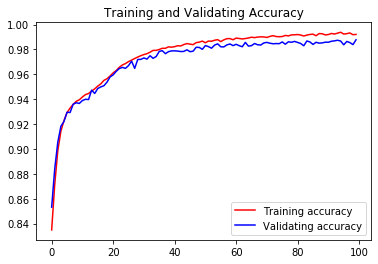

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()
plt.show()

In [8]:
predict = model.predict(x_test)

In [9]:
print(predict.shape)

(2500, 12)


In [6]:
model.evaluate(x_test, y_test, verbose = 2)

2500/1 - 0s - loss: 0.0172 - accuracy: 0.9886


[0.03421903380032163, 0.9885667]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\Min_Max_4_6_18_3_model.h5')